In [ ]:
#load and preprocessing the augmanted images using image data generator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

# Directory with our training Pneumonia pictures
train_Pneumonia = os.path.join('gdrive/My Drive/dataset/train')

# Create image generator to resize, normalize, filter, and augment the images
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.3,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_Pneumonia,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=64,
        subset='training',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_Pneumonia,  # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        subset='validation',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 14600 images belonging to 2 classes.
Found 6255 images belonging to 2 classes.


In [ ]:
#ResNet152V2 model for Pneumnia deep learning detection
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet152V2
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
from keras.layers.normalization import BatchNormalization
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
def createModel(): #ResNet152V2 model for Pneumnia deep learning detection
   top_model = Sequential()
   top_model.add(ResNet152V2(include_top=False,weights="imagenet",
                             input_shape=(224,224,3)))
   top_model.add(Reshape((7,7,2048), input_shape=(-1,7,7,2048)))
   top_model.add(Flatten())
   top_model.add(Dense(256, activation='relu'))
   top_model.add(Dropout(0.5))
   top_model.add(Dense(1, activation='sigmoid'))
   return top_model
model = createModel()

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Model)          (None, 7, 7, 2048)        58331648  
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 84,022,273
Trainable params: 83,878,529
Non-trainable params: 143,744
____________________________________

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 1280)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               32113152  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 34,371,649
Trainable params: 34,337,537
Non-trainable params: 34,112
_____________________________________

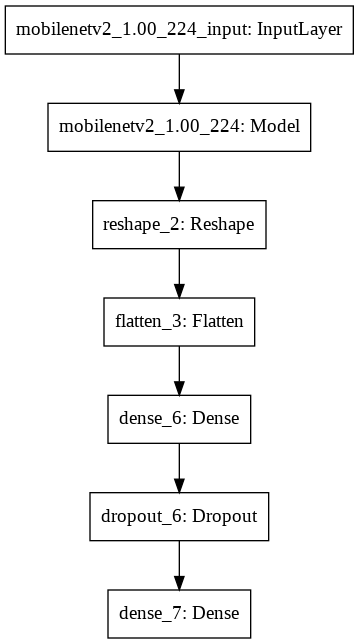

In [ ]:
#MobileNetV2 model for Pneumnia deep learning detection
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet152V2,MobileNetV2
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
from keras.layers.normalization import BatchNormalization
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
def createModel(): #MobileNetV2 model for Pneumnia deep learning detection
   top_model = Sequential()
   top_model.add(MobileNetV2(include_top=False,weights="imagenet",
                             input_shape=(224,224,3)))
   top_model.add(Reshape((7,7,1280), input_shape=(-1,7,7,1280)))
   top_model.add(Flatten())
   top_model.add(Dense(512, activation='relu'))
   top_model.add(Dropout(0.5))
   top_model.add(Dense(1, activation='sigmoid'))
   return top_model
model = createModel()

model.summary()
#plot the model as a graph
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
#LSTM-CNN code
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Reshape
import os
import zipfile
import tensorflow as tf
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import sys
from keras.layers import TimeDistributed
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten,Activation 
from keras.layers import AveragePooling2D, Input, Flatten
import numpy as np
from tensorflow import keras
from keras.layers import InputLayer
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.optimizers import SGD, Adam
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def crate_Model(): #LSTM-CNN code model for Pneumnia deep learning detection
    model = Sequential()
    model.add(BatchNormalization(input_shape=(200,200,3)))
    print("shape is {}".format(model.output_shape))
    model.add(TimeDistributed(LSTM(128, activation='tanh',
                                   return_sequences = True)))
    model.add(Dropout(0.6))
    model.add(BatchNormalization())
    model.add(TimeDistributed(Conv1D(128, kernel_size=4, activation='relu',
                                     padding="same",
                                     kernel_regularizer=regularizers.l2(0.01), 
                                     bias_regularizer=regularizers.l2(0.01))))
    model.add(AveragePooling2D((2,2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    print(model.summary())
  
    return model
model7=crate_Model()

#model1.summary()



shape is (None, 200, 200, 3)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 200, 200, 3)       12        
_________________________________________________________________
time_distributed_9 (TimeDist (None, 200, 200, 128)     67584     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 200, 128)     512       
_________________________________________________________________
time_distributed_10 (TimeDis (None, 200, 200, 128)     65664     
_________________________________________________________________
average_pooling2d_4 (Average (None, 100, 100, 128)     0         
_________________________________________________________________
flatten_4 (Flatten)      

In [ ]:
#CNN model 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from tensorflow.keras import initializers
from keras.layers.normalization import BatchNormalization



model = Sequential() #CNN code model for Pneumnia deep learning detection
model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3),padding="same", 
                 kernel_initializer='random_normal',bias_initializer='zeros', 
                 kernel_regularizer=regularizers.l2(0.02), 
                 bias_regularizer=regularizers.l2(0.02)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3),padding="same", kernel_initializer='random_normal',
                 bias_initializer='zeros', 
                 kernel_regularizer=regularizers.l2(0.02), 
                 bias_regularizer=regularizers.l2(0.02)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(3,3)))

model.add(Conv2D(128, (2,2), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(3,3)))
model.add(Dropout(0.2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(512,activation='relu')
#model.add(Dropout(0.5))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model7=model



SyntaxError: ignored

In [ ]:
#Optimizer and fit function
from tensorflow.keras.optimizers import RMSprop, Adamax
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam, Adamax
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
opt = Adamax(lr= 0.00006, beta_1=0.9, beta_2=0.999, epsilon=1e-07)   #adam = Adam(lr=0.0001), momentum=0.9 Adamax(lr= 0.00045, beta_1=0.9, beta_2=0.999, epsilon=1e-07)  
#opt = keras.optimizers.Adam(learning_rate=0.07)
#model.compile(loss='categorical_crossentropy', optimizer=opt)

model8.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=METRICS)

history = model8.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=200,
      verbose=1,
      validation_data = validation_generator,
     
      validation_steps=8) 
      

#Save and serialize
model8.save("path_to_my_model_lstm_cnn_89")
model8.save('my_model_lstm_cnn_89.h5')
print('model saved!!!!!')


Epoch 1/200
8/8 [==============================] - 19s 2s/step - loss: 0.8620 - tp: 145.0000 - fp: 53.0000 - tn: 33.0000 - fn: 25.0000 - accuracy: 0.6953 - precision: 0.7323 - recall: 0.8529 - auc: 0.7039 - val_loss: 0.7167 - val_tp: 143.0000 - val_fp: 42.0000 - val_tn: 60.0000 - val_fn: 11.0000 - val_accuracy: 0.7930 - val_precision: 0.7730 - val_recall: 0.9286 - val_auc: 0.9161
Epoch 2/200
8/8 [==============================] - 19s 2s/step - loss: 0.8871 - tp: 125.0000 - fp: 65.0000 - tn: 44.0000 - fn: 22.0000 - accuracy: 0.6602 - precision: 0.6579 - recall: 0.8503 - auc: 0.7188 - val_loss: 0.7300 - val_tp: 133.0000 - val_fp: 22.0000 - val_tn: 73.0000 - val_fn: 28.0000 - val_accuracy: 0.8047 - val_precision: 0.8581 - val_recall: 0.8261 - val_auc: 0.8952
Epoch 3/200
8/8 [==============================] - 21s 3s/step - loss: 0.8553 - tp: 121.0000 - fp: 46.0000 - tn: 47.0000 - fn: 42.0000 - accuracy: 0.6562 - precision: 0.7246 - recall: 0.7423 - auc: 0.7192 - val_loss: 0.7499 - val_tp: 